In [1]:
from pandas import read_csv
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import math
import numpy as np

import data

In [2]:
# X_train_data = read_csv('../X_train_nostring.csv')
# # X_train_data.fillna(-3, inplace=True)
# X_train = X_train_data.values[:,1:]

y_train_data = read_csv('../y_train.csv')
y_train = y_train_data.values[:,1]
for i in range(len(y_train)):
    if y_train[i] == -1:
        y_train[i] = 0

# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train, y_train)

In [3]:
# X_test_data = read_csv('../X_test_nostring.csv')
# # X_test_data.fillna(-3, inplace=True)
# X_test = X_test_data.values[:,1:]

# X_test = scaler.fit_transform(X_test)

In [4]:
dataset = data.Dataset()
X_train = dataset.getTrain().values
X_test = dataset.getTest().values

In [5]:
rfmodel = RandomForestClassifier(random_state=441)
param_grid = { 
    'n_estimators': [100],
    'max_features': ['sqrt'],
    'max_depth' : [40],
    'criterion' :['log_loss']
}

In [6]:
grid_search = GridSearchCV(estimator=rfmodel, param_grid=param_grid, scoring="neg_log_loss", cv=5)
grid_result = grid_search.fit(X_train, y_train)

# 40 50 same
#Best: -0.943736 using {'criterion': 'log_loss', 'max_depth': 40, 'max_features': 'sqrt', 'n_estimators': 1000}
#Best: -0.943736 using {'criterion': 'log_loss', 'max_depth': 50, 'n_estimators': 1000}

# print results
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))

print("\nBest: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-1.013561 with: {'criterion': 'log_loss', 'max_depth': 40, 'max_features': 'sqrt', 'n_estimators': 100}

Best: -1.013561 using {'criterion': 'log_loss', 'max_depth': 40, 'max_features': 'sqrt', 'n_estimators': 100}


In [7]:
rfmodel = RandomForestClassifier(random_state=441, oob_score=True, criterion = 'log_loss', max_depth = 40, max_features = 'sqrt', n_estimators = 100)
rfmodel.fit(X_train, y_train)
rf_acc = rfmodel.oob_score_
rfimportance = rfmodel.feature_importances_

print(rf_acc)

0.5783541666666666


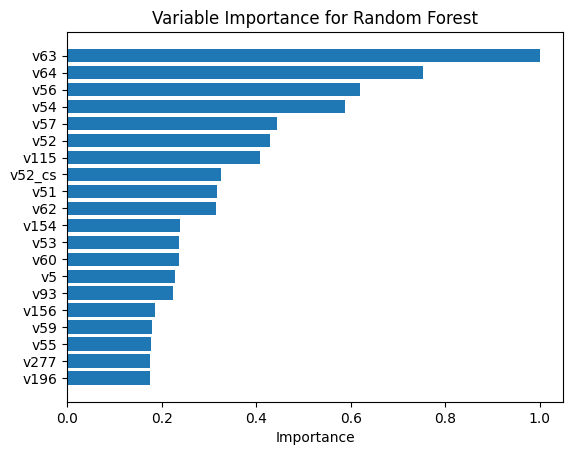

In [9]:
# Sort and standardize
names = dataset.getTrain().columns
m = rfimportance.max()
standard = [x / m for x in rfimportance]
label = dict(sorted(zip(names, standard),  key=lambda x: x[1])[-20:])

plt.barh(list(label.keys()), list(label.values()))
plt.xlabel("Importance")
plt.title("Variable Importance for Random Forest")
plt.show()

In [10]:
prob = rfmodel.predict_proba(X_test)

In [11]:
test = np.c_[ np.ones(11438), prob ]              # add a column

for i in range(len(test)):
    test[i][0] = i

np.savetxt('random_forest_test.csv', test, delimiter=',', header="id,no answer,very important,quite important,not important,not at all important", comments="", fmt='%1.4f') 

In [22]:
#700 > 800 > 600 > 900 > all(1180) > 500 > 300 > 100.
dict(sorted(zip(names, standard),  key=lambda x: x[1])[-750:]).keys()

dict_keys(['v231b_GE', 'v275b_N2_UKK1', 'v228b_SK', 'v275b_N2_AZ-SKR', 'v275b_N2_UA13', 'v233b_15', 'v275b_N2_NO04', 'v231b_BE', 'v231b_11', 'v275b_N2_RU81', 'v231b_US', 'v228b_14', 'v275b_N2_NL31', 'v275b_N2_ES12', 'v231b_HU', 'v275b_N2_UA51', 'v233b_MK', 'v275b_N2_AZ-GYG', 'v251b_IT', 'v231b_GR', 'v275b_N2_UKH1', 'v275b_N2_ES41', 'v251b_35', 'v231b_PT', 'v231b_AT', 'v275b_N2_PL63', 'v275b_N2_AZ-GAD', 'v251b_PL', 'v275b_N2_UKJ2', 'v275b_N2_UKJ1', 'v233b_BE', 'v275b_N2_PL84', 'v233b_HR', 'v228b_TR', 'v233b_GR', 'v275b_N2_PT18', 'v275b_N2_AZ-HAC', 'v233b_143', 'v233b_AT', 'v251b_PT', 'v275b_N2_ES42', 'v275b_N2_UA11', 'v251b_BA', 'v275b_N2_FRJ2', 'v228b_RO', 'v233b_DZ', 'v275b_N2_HU32', 'v251b_UA', 'v275b_N2_PL51', 'v228b_143', 'v275b_N2_UKD3', 'v233b_SK', 'v275b_N2_ES11', 'v275b_N2_NO06', 'v275b_N2_ES52', 'v275b_N2_UKI7', 'v275b_N2_ES70', 'v233b_ES', 'v233b_14', 'v233b_XK', 'v275b_N2_FRG0', 'v231b_ES', 'v233b_FR', 'v275b_N2_UKG2', 'v228b_FR', 'v231b_BY', 'v233b_TR', 'v275b_N2_NL11', 'v2